In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os


In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Projects')
amazon_data=pd.read_csv('ratings_Electronics.csv',header=None)

In [6]:
# Read the data from the csv file
amazon_data.head()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [0]:
# first three columns are userId, productId, and ratings and the fourth column is timestamp
# Adding the columns
amazon_data.columns =['userId', 'productId', 'ratings', 'timestamp']

In [8]:
amazon_data.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [0]:
# Dropping the timestamp column
amazon_data.drop(['timestamp'], axis =1, inplace =True)

In [11]:
amazon_data.head()

,userId,productId,ratings
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [14]:
# Doing basic Checks and analysis
amazon_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ratings,7824482.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


In [15]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [16]:
# Checking for null values
amazon_data.isnull().any()

userId       False
productId    False
ratings      False
dtype: bool

In [23]:
# Check for count unique Ids and ratings
print('Unique User ids: ', amazon_data['userId'].nunique())
print('Unique Product ids: ', amazon_data['productId'].nunique())
print('Distinct Ratings: ', amazon_data['ratings'].nunique())

Unique User ids:  4201696
Unique Product ids:  476002
Distinct Ratings:  5


In [25]:
# Maximum and Minimum ratings given
print("Maximum rating is: ",amazon_data['ratings'].max())
print("Minimum rating is: ",amazon_data['ratings'].min())

Maximum rating is:  5.0
Minimum rating is:  1.0


In [26]:
# Number of times each rating given (Ratings count)
amazon_data['ratings'].value_counts()

5.0    4347541
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: ratings, dtype: int64

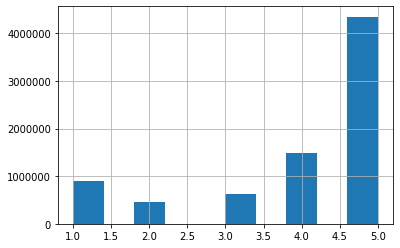

In [27]:
# Plotting the histogram for ratings count
amazon_data['ratings'].hist()

In [33]:
# Identify unique productId under each rating
amazon_data.groupby('ratings')['productId'].nunique()

ratings
1.0    176283
2.0    123419
3.0    152827
4.0    223845
5.0    358458
Name: productId, dtype: int64

In [34]:
# Identify unique userId under each rating
amazon_data.groupby('ratings')['userId'].nunique()

ratings
1.0     784562
2.0     406277
3.0     529665
4.0    1089450
5.0    2597345
Name: userId, dtype: int64

In [36]:
# Take subset of the dataset on the basis of count of ratings
tf = amazon_data.userId.value_counts().rename_axis('UserId').reset_index(name='no_ratings')
tf.head()

,UserId,no_ratings
0,A5JLAU2ARJ0BO,520
1,ADLVFFE4VBT8,501
2,A3OXHLG6DIBRW8,498
3,A6FIAB28IS79,431
4,A680RUE1FDO8B,406


In [0]:
# Dropping the users who have rated less than 50 products.
amazon_df = amazon_data[amazon_data.userId.isin(tf[tf['no_ratings'] >= 50].UserId)]

In [38]:
# number of unique users now who have atleast rated 50 products
amazon_df.userId.nunique()

1540

In [39]:
# number of unique products now
amazon_df.productId.nunique()

48190

In [40]:
# Split the data using test and train
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(amazon_df, test_size=0.3, random_state=98)
train_set.head()

,userId,productId,ratings
2816976,A3R4794K2RVU1S,B002RWJGHC,5.0
283858,A257X1MQJO82P2,B00009R6TA,5.0
7309662,A14JBDSWKPKTZA,B00CRY250U,5.0
7217647,A3E9O1VNJ3U324,B00C6OBW1E,5.0
1213362,AFNG8O2DXRCUV,B000NMFCIA,4.0


In [42]:
test_set.head()

,userId,productId,ratings
4104633,A38CHSS1ZAE51B,B004GF8TIK,5.0
217313,AOEDWQLH2WKKW,B00007E7JU,5.0
4222213,ACJT8MUC0LRF0,B004KMC0SO,5.0
6314488,A3G5MOHY1U635N,B008OEHV6U,2.0
2989486,A2VC48WIMY6L6E,B00313JD06,5.0


In [43]:
# Print the shape of the train and test data set
print(test_set.shape)
print(train_set.shape)

(37762, 3)
(88109, 3)


**Popularity Recommender Model**

In [0]:
# Print Popularity Recommendation System
class popularity_recommender_py():
    def __init__(self):
        self.train_set = None
        self.user_Id = None
        self.product_Id = None
        self.popularity_recommendations = None
        
    #Create the popularity based recommender system model
    def create(self, train_set, user_Id, product_Id):
        self.train_set = train_set
        self.user_Id = user_Id
        self.product_Id = product_Id

       
        train_data_grouped = train_set.groupby([self.product_Id]).agg({self.user_Id: 'count'}).reset_index()
        train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
    
        
        train_data_sort = train_data_grouped.sort_values(['score', self.product_Id], ascending = [0,1])
    
        #Generate a recommendation rank based upon score
        train_data_sort['rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)
   
    #Use the popularity based recommender system model to
    #make recommendations
    def recommend(self, user_id):    
        user_recommendations = self.popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['userId'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations


In [0]:
popularity_model=popularity_recommender_py()
popularity_model.create(train_set,'userId','productId')
train_users = train_set['userId'].unique()

In [73]:
train_users

array(['A3R4794K2RVU1S', 'A257X1MQJO82P2', 'A14JBDSWKPKTZA', ...,
       'A3O5ASFUXC32UA', 'A34DQINHT6NYJU', 'A3J3ZHGDUDPCFL'], dtype=object)

In [74]:
 # recommending for user at index value 5
popularity_model.recommend(train_users[4]).head(10)

,userId,productId,score,rank
30895,AFNG8O2DXRCUV,B0088CJT4U,156,1.0
19580,AFNG8O2DXRCUV,B003ES5ZUU,137,2.0
8623,AFNG8O2DXRCUV,B000N99BBC,125,3.0
30307,AFNG8O2DXRCUV,B007WTAJTO,117,4.0
30589,AFNG8O2DXRCUV,B00829TIEK,97,5.0
30585,AFNG8O2DXRCUV,B00829THK0,96,6.0
31142,AFNG8O2DXRCUV,B008DWCRQW,91,7.0
17305,AFNG8O2DXRCUV,B002R5AM7C,88,8.0
22711,AFNG8O2DXRCUV,B004CLYEDC,87,9.0
30627,AFNG8O2DXRCUV,B00834SJNA,80,10.0


**Collabrative Filtering Model**

In [0]:
!pip install surprise

In [0]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
import random

In [0]:
# Load the dataset
reader = Reader(rating_scale = (1,5))
data = Dataset.load_from_df(amazon_df, reader = reader)

In [0]:
#spliting the train and test with surprise model functionality
trainset, testset = train_test_split(data, test_size=.3)

In [54]:
#  KNN algorithm
knn_algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})

# Train the model with train dataset
knn_algo.fit(data.build_full_trainset())

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [0]:
# Evalute on test set
test_pred = knn_algo.test(testset)

In [56]:
# Check for predicted data
test_pred[5]

Prediction(uid='A3U41ZL33SS92P', iid='B00EXK14S0', r_ui=2.0, est=2.0948991919505904, details={'actual_k': 8, 'was_impossible': False})

In [58]:
# converting results to dataframe
test_pred_df = pd.DataFrame(test_pred)
test_pred_df.head()

,uid,iid,r_ui,est,details
0,A3TCMJ6GKZJFBQ,B0012IPP1I,4.0,4.0,"{'actual_k': 1, 'was_impossible': False}"
1,A2I357I10ZY7CI,B001TI9AV2,4.0,4.0,"{'actual_k': 1, 'was_impossible': False}"
2,AK3GKIV8DEY8B,B0035JJJPA,4.0,4.0,"{'actual_k': 1, 'was_impossible': False}"
3,APBB297H3ZA5E,B0072LATE2,4.0,4.0,"{'actual_k': 1, 'was_impossible': False}"
4,ACJT8MUC0LRF0,B0088CJT4U,5.0,5.0,"{'actual_k': 50, 'was_impossible': False}"


In [59]:
# Making prediction for a single user
knn_algo.predict(uid="APBB297H3ZA5E",iid="B0072LATE2")

Prediction(uid='APBB297H3ZA5E', iid='B0072LATE2', r_ui=None, est=4.0, details={'actual_k': 1, 'was_impossible': False})

**Evaluate Both Models**

In [0]:
def GetpmRMSE():
    import popularity_recommender_py.recommend
    uuid = test_set['userId'].unique()
    rand_uuid = random.sample(list(uuid), 10)
    arr_RMSE = []
    RMSE = -1
    for ruid in rand_uuid:
        #print (ruid)
        UserPred = recommend(ruid)
        #print ("UIID: " + str(len(UserPred)))
        Actual = test_set[test_set.userId == ruid]
        UserPred = UserPred[UserPred['productId'].isin(Actual['productId'].unique())]
        Actual = Actual[Actual['productId'].isin(UserPred['productId'].unique())]
        uiid = Actual['productId'].unique()
        #print ("UIID: " + str(len(uiid)))
        if len(uiid) > 0:
            arr_Actual = []
            arr_Pred = []
            score = 0
            error = 0
            for uid in uiid:
                score = Actual[Actual.productId == uid]['score']
                arr_Actual.append(score.values[0])
                score = UserPred[UserPred.productId == uid]['score']
                arr_Pred.append(score.values[0])
                error = sqrt(mean_squared_error(arr_Actual, arr_Pred))
                arr_RMSE.append(error)
                #print (error)
    RMSE = np.average(arr_RMSE)
    return RMSE

In [88]:
# Evaluation for Collaborative Filtering Model.
print ("Collaborative Model RMSE: ", accuracy.rmse(test_pred))

RMSE: 0.0336
Collaborative Model RMSE:  0.03356724438417568


**Get top K recommendations (Top 5)**

In [90]:
Users = amazon_df['userId'].unique()
print(popularity_model.recommend(Users[7]).head(5) ) # recommendations for userID 'A25RTRAPQAJBDJ'
print(popularity_model.recommend(Users[251]).head(5) ) # recommendations for userID 'A3V6Z4RCDGRC44'

               userId   productId  score  rank
30895  A25RTRAPQAJBDJ  B0088CJT4U    156   1.0
19580  A25RTRAPQAJBDJ  B003ES5ZUU    137   2.0
8623   A25RTRAPQAJBDJ  B000N99BBC    125   3.0
30307  A25RTRAPQAJBDJ  B007WTAJTO    117   4.0
30589  A25RTRAPQAJBDJ  B00829TIEK     97   5.0
               userId   productId  score  rank
30895  A3V6Z4RCDGRC44  B0088CJT4U    156   1.0
19580  A3V6Z4RCDGRC44  B003ES5ZUU    137   2.0
8623   A3V6Z4RCDGRC44  B000N99BBC    125   3.0
30307  A3V6Z4RCDGRC44  B007WTAJTO    117   4.0
30589  A3V6Z4RCDGRC44  B00829TIEK     97   5.0


In [91]:
# Top 5 recommendation using Collaborative Filtering Model
new_testset = trainset.build_anti_testset() # Building testset using trainset
new_testset[0:5]

[('A3UW0PQLDUACMH', 'B00BN0N0LW', 4.264615419537164),
 ('A3UW0PQLDUACMH', 'B002WE4HE2', 4.264615419537164),
 ('A3UW0PQLDUACMH', 'B000N4WRFY', 4.264615419537164),
 ('A3UW0PQLDUACMH', 'B00CF9MNQI', 4.264615419537164),
 ('A3UW0PQLDUACMH', 'B0013ITQA8', 4.264615419537164)]

In [93]:
predictions_colab = knn_algo.test(new_testset[0:10000])
predictions_colab_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions_colab])
predictions_colab_df.columns = ["userId","productId","est_rating"]
predictions_colab_df.sort_values(by = ["userId", "est_rating"],ascending=False,inplace=True)
predictions_colab_df.head()

,userId,productId,est_rating
1,A3UW0PQLDUACMH,B002WE4HE2,5.0
2,A3UW0PQLDUACMH,B000N4WRFY,5.0
11,A3UW0PQLDUACMH,B004YDUZ22,5.0
14,A3UW0PQLDUACMH,B000NBBWNU,5.0
21,A3UW0PQLDUACMH,B004ZP74UA,5.0


In [94]:
print('# Top 5 recommendation using Collaborative Filtering Model',"\n",predictions_colab_df.groupby("userId").head(5).reset_index(drop=True))

# Top 5 recommendation using Collaborative Filtering Model 
            userId   productId  est_rating
0  A3UW0PQLDUACMH  B002WE4HE2         5.0
1  A3UW0PQLDUACMH  B000N4WRFY         5.0
2  A3UW0PQLDUACMH  B004YDUZ22         5.0
3  A3UW0PQLDUACMH  B000NBBWNU         5.0
4  A3UW0PQLDUACMH  B004ZP74UA         5.0


# **Summary of Both the Models and Insights**

**COLLABORATIVE FILTERING Model**

Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. Differnt recommendations are given for different users, as Collaborative Filtering model is based on user preferrences unlike Popularity Model.

**POPULARITY RECOMMENDATION SYSTEM**

The Popularity-based recommender system is non-personalised and the recommendations are based on frequecy counts, which may be not suitable to the user.
It is evident that the same set of recommendation for all the users as this model is not user specific.
This model gives recommendations based on popularity of the item

**RMSE EVALUATION**

Collaborative model have given the better accuracy (less error, RMSE) than Popularity Model. As Collaborative model is based on user/item charecteristics, it will be more accurate than Popularity Model

**CONCLUSION**

The difference is evident above for the user ids The Popularity based model has recommended the same set of 5 products to both So Collaborative Filtering model will give precise recommendation than Popularity Model. It was evident with the RMSE scores of each models.